# Importing libraries



In [3]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup
import string
import spacy
import re


# Scrapping Text

In [4]:
url = "https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"

In [5]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" }
page = requests.get(url,headers = headers)
soup = BeautifulSoup(page.content, 'html.parser')
# User agent to bypass security features on site

In [6]:
# Extracting Title
title = soup.find('h1',class_= "entry-title")
title = title.text.replace('\n'," ") # replacing all the next lines and using space instead
title

'AI in healthcare to Improve Patient Outcomes'

In [7]:
# Extracting content
content = soup.findAll(attrs = {'class':'td-post-content'})
content = content[0].text.replace('\n'," ")
content

' Introduction “If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research. After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detectin

For doing separation in words we will use " "(space) as delimiter
so here "," or other punctuation should not be there
so removing punctuation


# Removing punctuation

In [8]:
content = content.translate(str.maketrans('','', string.punctuation))
content

' Introduction “If anything kills over 10 million people in the next few decades it will be a highly infectious virus rather than a war Not missiles but microbes” Bill Gates’s remarks at a TED conference in 2014 right after the world had avoided the Ebola outbreak When the new unprecedented invisible virus hit us it met an overwhelmed and unprepared healthcare system and oblivious population This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities For the past few years artificial intelligence has proven to be of tangible potential in the healthcare sectors clinical practices translational medical and biomedical research After the first case was detected in China on December 31st 2019 it was an AI program developed by BlueDot that alerted the world about the pandemic It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and i

# Tokens(individual words)


In [9]:
# Tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)
#print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
len(text_tokens)

1814

Removing Stop Words : like "a" "the" "is" "are" etc.

In [11]:
# Removing Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])


['Introduction', '“', 'If', 'anything', 'kills', '10', 'million', 'people', 'next', 'decades', 'highly', 'infectious', 'virus', 'rather', 'war', 'Not', 'missiles', 'microbes', '”', 'Bill', 'Gates', '’', 'remarks', 'TED', 'conference', '2014', 'right', 'world', 'avoided', 'Ebola', 'outbreak', 'When', 'new', 'unprecedented', 'invisible', 'virus', 'hit', 'us', 'met', 'overwhelmed']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
len(no_stop_tokens)  # differnce between can be seen  around 600 words

1198

# Data Analysis

## Checking for positive words

In [13]:
with open("Downloads/positive-words.txt","r")as pos:
    poswords = pos.read().split("\n")
    poswords = poswords[0:]  # saving in local memory;

In [14]:
pos_count = " ".join([w for w in no_stop_tokens if w in poswords])
pos_count = pos_count.split(" ")
#space ke sath join kr liya pehle jitne bhi words aaye actual link mein

# then  unhen split kr diya


<b>Positive Score</b>


In [15]:
Positive_score = len(pos_count)
print(Positive_score)

77


In [16]:
#pos_count

### For negative words

In [17]:
with open("Downloads/negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[0:]

In [18]:
neg_count = " ".join([w for w in no_stop_tokens if w in negwords])
neg_count = neg_count.split()

### Negative Score

In [19]:
Negative_score =  len(neg_count)
print(Negative_score)

33


In [20]:
filter_content = ' '.join(no_stop_tokens)

data = [[url,title,content,filter_content,Positive_score,Negative_score]]


In [21]:
data = pd.DataFrame(data,columns =["url","title","content","filter_content","Positive_score","Negative_score"])

In [22]:
data

,url,title,content,filter_content,Positive_score,Negative_score
0,https://insights.blackcoffer.com/ai-in-healthc...,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 milli...,Introduction “ If anything kills 10 million pe...,77,33


For Polarity and Subjectivity we can use textblob library of python
<br>Polarity depicts inclination towards positive or negative sentiment
<br>Subjectivity quantifies amount of personal opinion and factual information contained in the text

# Polarity Score & Subjectivity Score`

In [23]:
from textblob import TextBlob

# Get the Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity])

# Adding Subjectiviy & Polarity
data[["polarity","subjectivity"]] = data.apply(sentiment_analysis,axis =1)
data

,url,title,content,filter_content,Positive_score,Negative_score,polarity,subjectivity
0,https://insights.blackcoffer.com/ai-in-healthc...,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 milli...,Introduction “ If anything kills 10 million pe...,77,33,0.136936,0.463364


<b>Average sentence length <b>
    

In [24]:
# AVG Sentence lengtha
avg_sentence_length = len(content.replace(' ',''))/len(re.split(r'[?!.]',content))
print("Word Average = ",avg_sentence_length)

Word Average =  10162.0


 For complexity, fogindex etc type statistics handled by 
 Textstat library

In [25]:
import textstat



<b>FOG INDEX <b>


In [26]:
FOG_INDEX = (textstat.gunning_fog(content))
print(FOG_INDEX)

721.92


<b> Avg number of words per sentence <b>

In [27]:
avg_number_of_words_per_sentence = [len(l.split()) for l in re.split(r'[?!.]',content) if l.strip()]
avg_number_of_words_per_sentence = print(sum(avg_number_of_words_per_sentence)/len(avg_number_of_words_per_sentence))

1790.0


<b> Complex word count <b>

In [28]:
def syllable_count(word):
    count =0
    vowels = "AEIOUaeiou"
    if word[0] in vowels:
        count+=1
    for index in range(1,len(word)):
        if word[index] in vowels and word[index-1] not in vowels:
            count+=1
            if word.endswith("es" or "ed"):
                count-=1
    if count==0:
        count+=1
    return count

In [29]:
complex_words = syllable_count(content)
print(complex_words)

3481


<b> Word Count <b>

In [30]:
Word_count = len(content)
print(Word_count)

11955


<b> Percentage of Complex Words <b>

In [31]:
pcw = (complex_words/Word_count)*100
print(pcw)

29.117524048515264


<b> Personal Pronouns <b>

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')
# it is used to get the already made tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
def ProperNounExtracter(text):
    count =0
    sentences =  nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for(word,tag) in tagged:
            if tag == 'PRP': # if word is proper noun
                count = count+1
    return (count)
# calling above function
Personal_Pronouns = ProperNounExtracter(content)

<b>Average word length <b>

In [34]:
Average_word_length = len(content.replace(' ',''))/len(content.split())
print(Average_word_length)

5.677094972067039


<b> Syllable per word <b>

In [35]:
words = content.replace(' ','')
syllable_count =0
for w in words:
    if w =='a' or w=='e' or w=='i' or w=='o' or w=='u' or w=='A'or w=='E' or w=='I' or w=='O' or w=='U' :
       syllable_count = syllable_count+1
print("The avg number of syllable in the word is : ")
print(syllable_count/len(content.split()))

The avg number of syllable in the word is : 
2.182122905027933


# Word Cloud

In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud,STOPWORDS
# define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud) # display image show
    plt.axis("off") # NO axis details

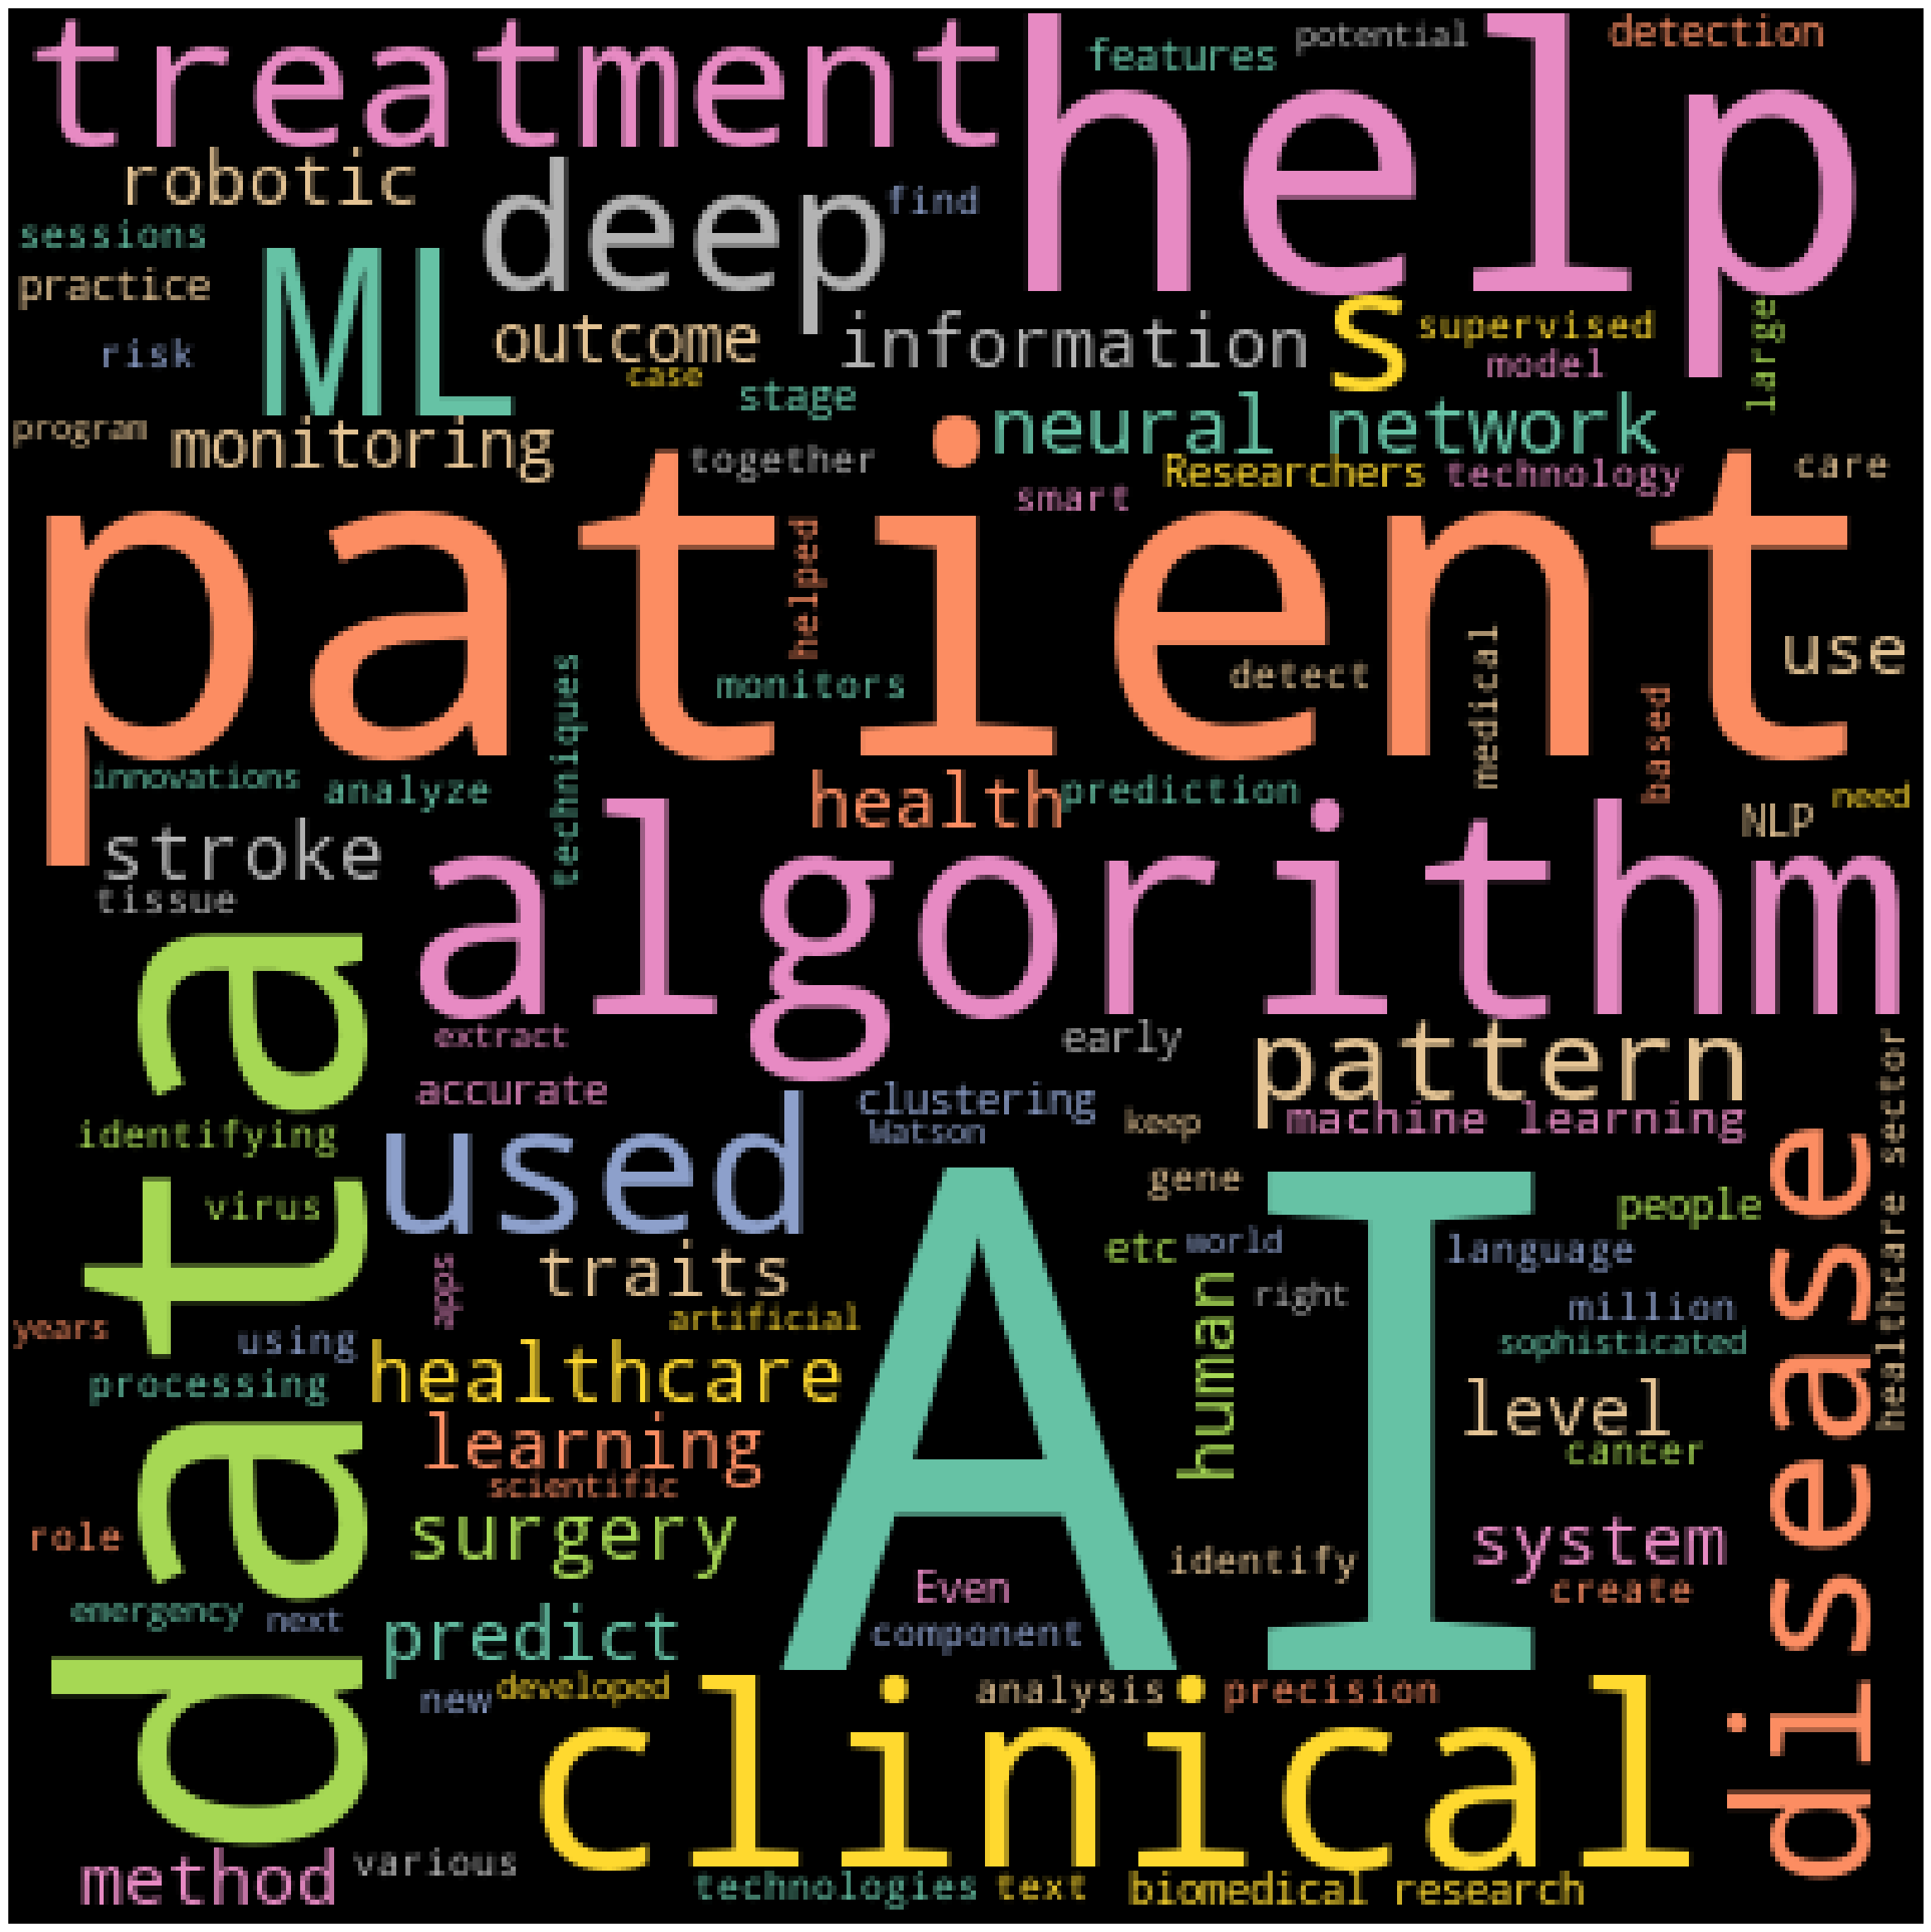

In [42]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 400, height = 400, background_color = 'black',max_words =100,colormap = 'Set2',stopwords = stopwords).generate(content)
plot_cloud(wordcloud)

<b> Positive Word Cloud <b>

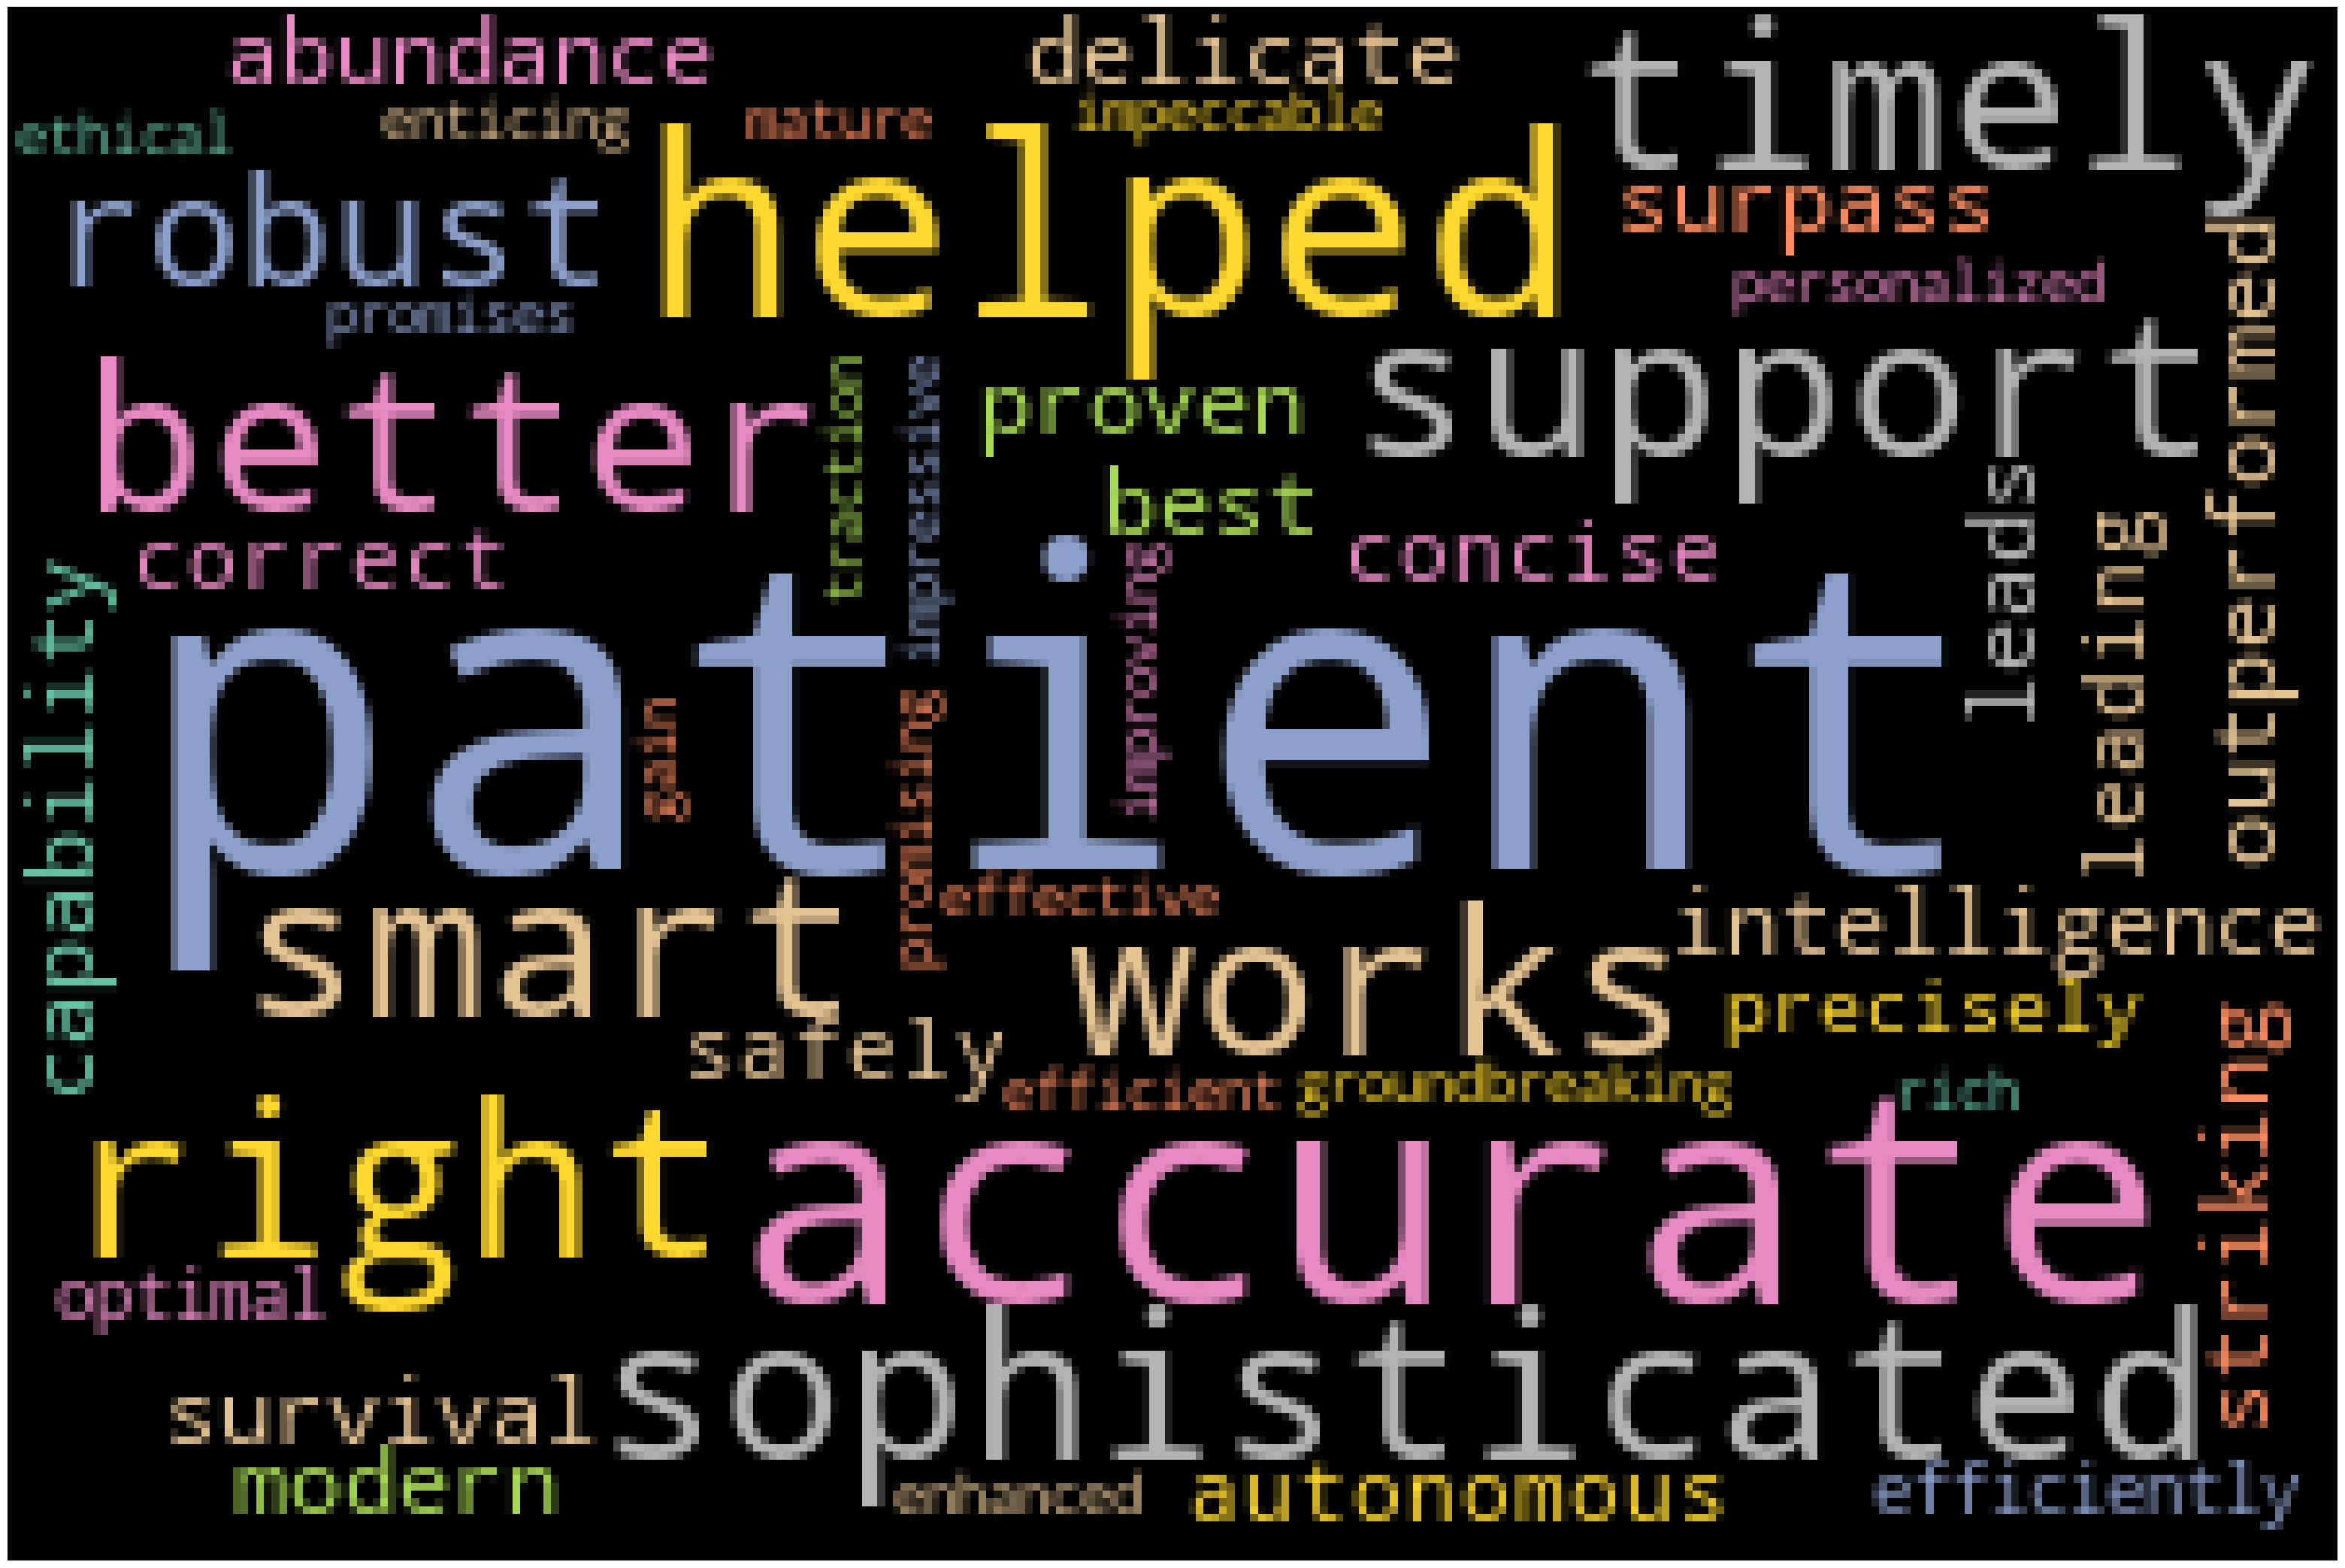

In [45]:
# Choosing the only words which are present in posword
pos_review = " ".join([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 300, height = 200, background_color = 'black', max_words = 100, colormap ='Set2',stopwords = stopwords).generate(pos_review)
plot_cloud(wordcloud)

<b> Negative word cloud <b>

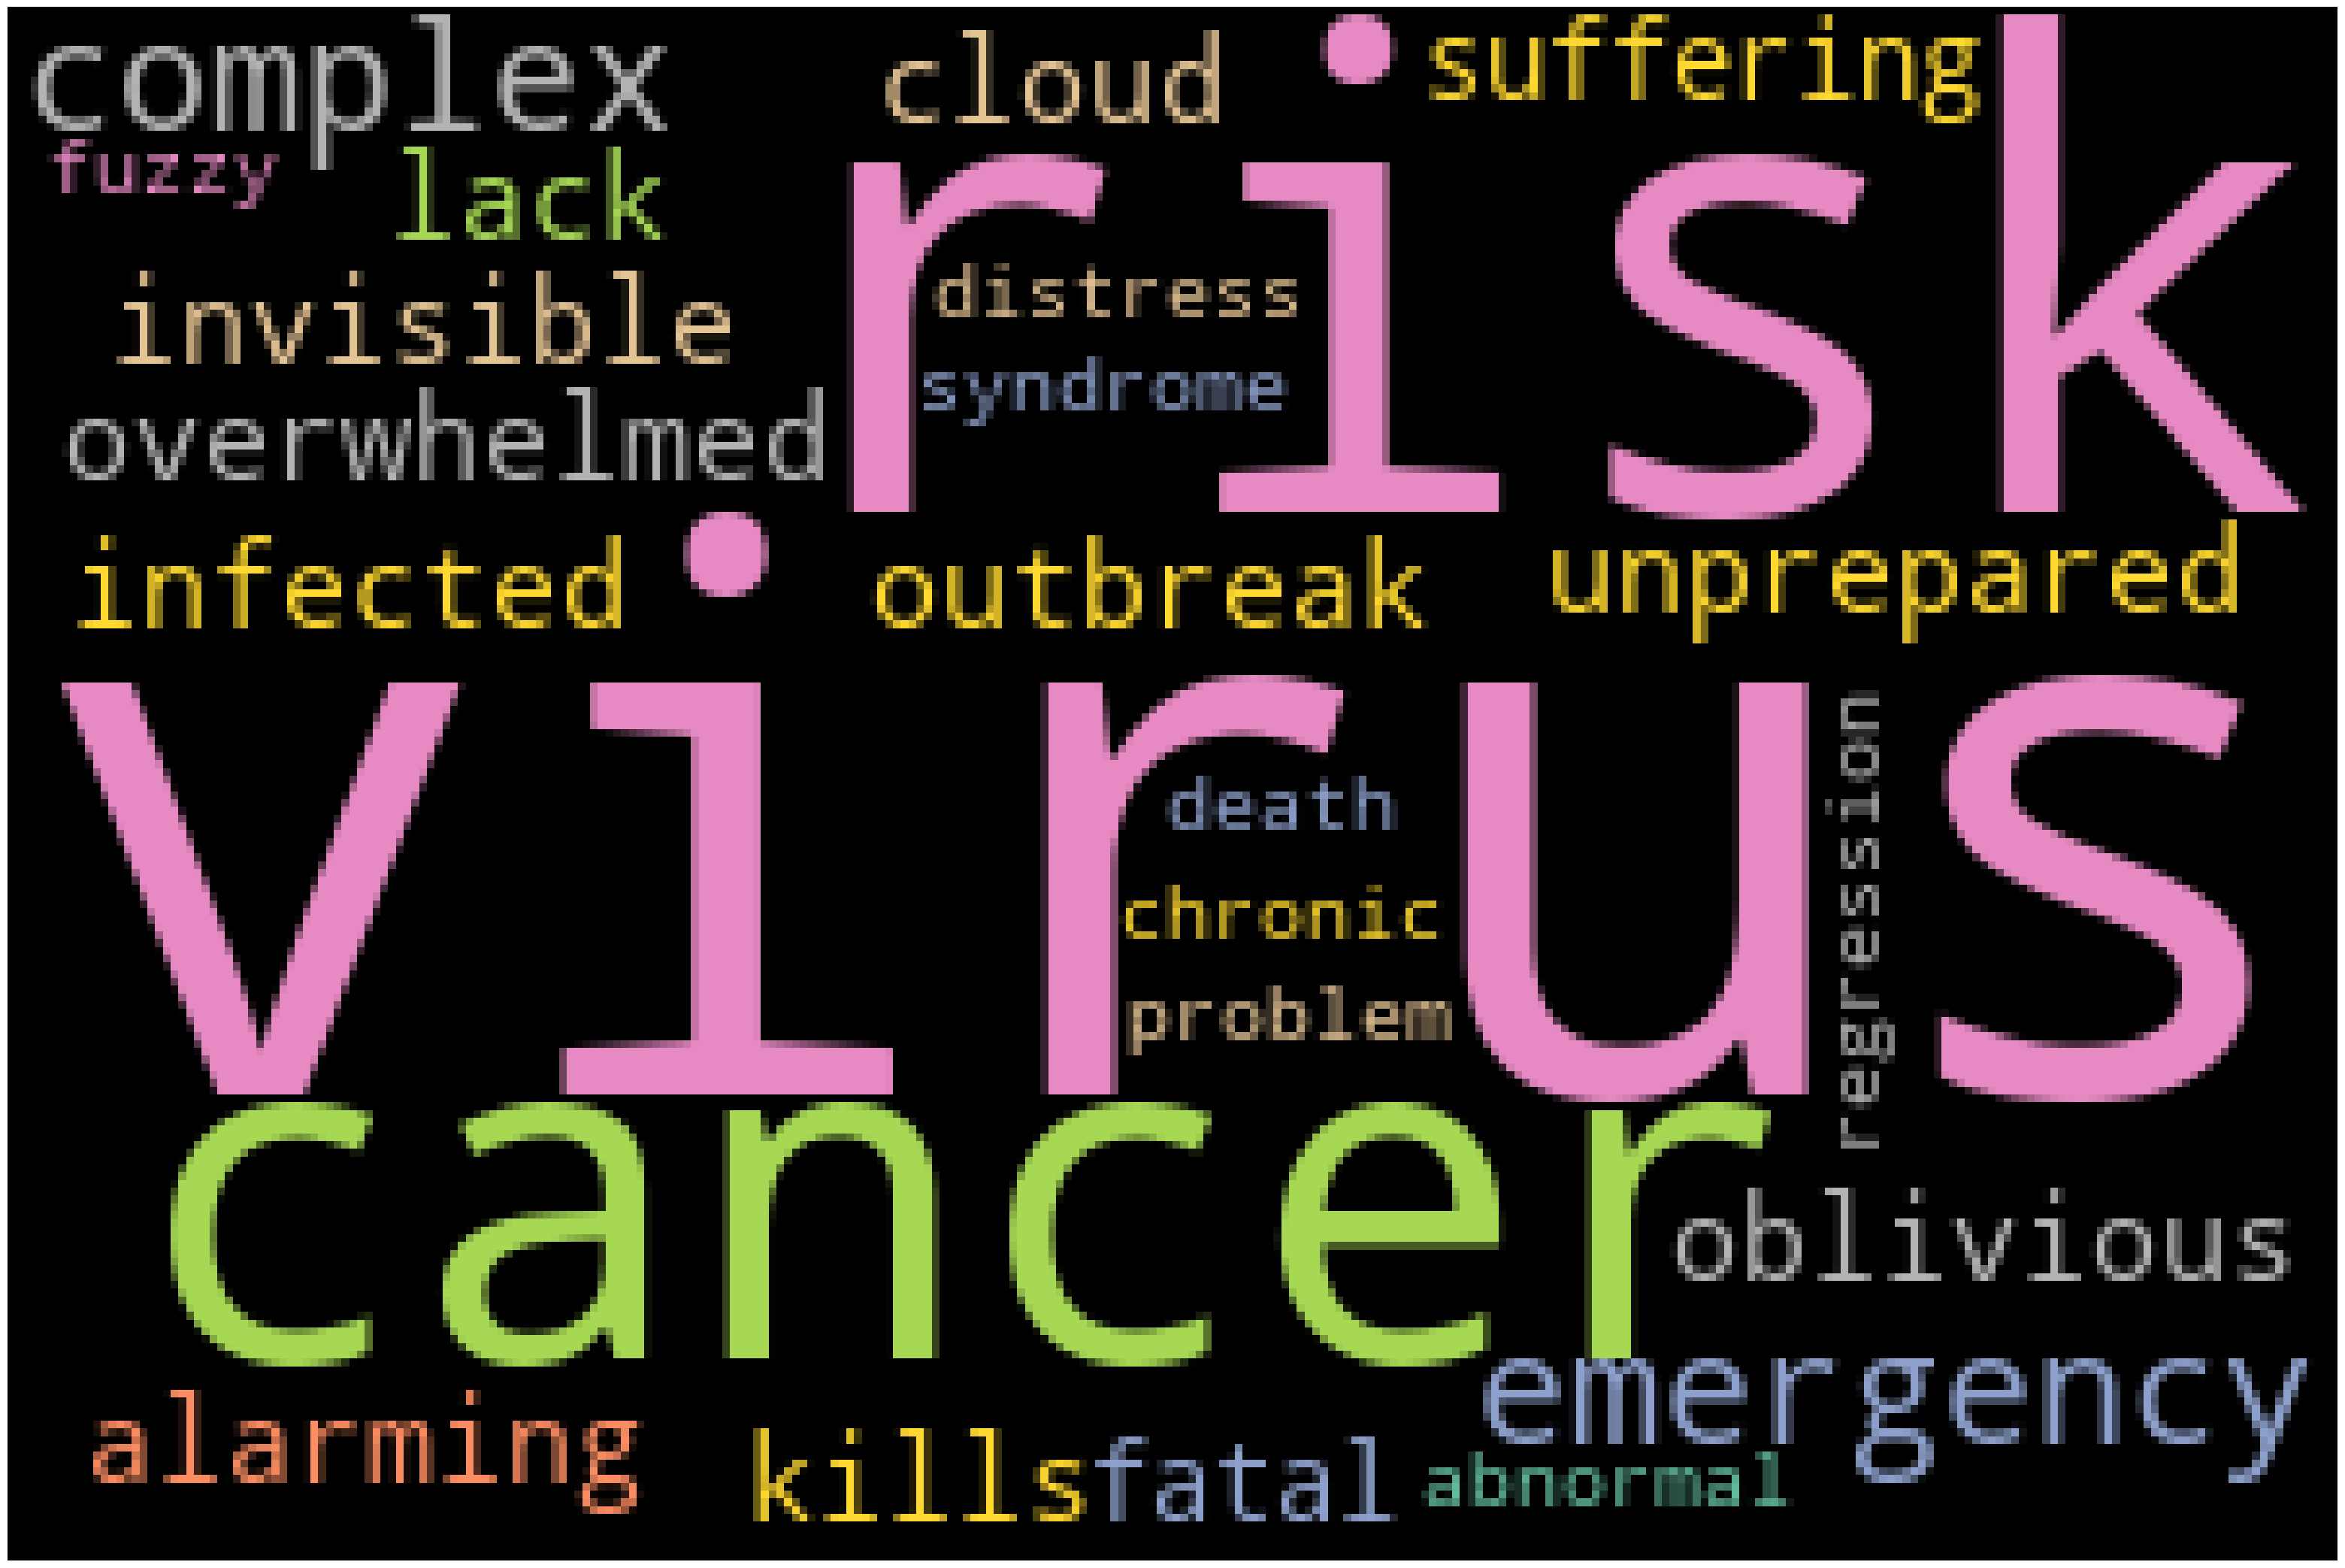

In [46]:
# Choosing the only words which are present in negwords
neg_review = " ".join([w for w in neg_count if w in negwords])
wordcloud = WordCloud(width = 300, height = 200, background_color= 'black',max_words = 100, colormap = 'Set2',stopwords = stopwords).generate(neg_review)
plot_cloud(wordcloud)